### Importing data

In [16]:
import pandas as pd
from utils.dates import Dates

data_folder = 'data/'
itens_file_name = 'valor_unitario_aprovado_sample.csv'

itens_file_path = data_folder + itens_file_name

date_column = 'Data'
price_column = 'ValorUnitarioAprovado'

dt = pd.read_csv(itens_file_path, usecols = ['Item', 'ValorUnitarioAprovado', 'Data',])
dt[date_column] = pd.to_datetime(dt[date_column], format = Dates.DATE_INPUT_FORMAT)
dt.head()

ValueError: labels ['Unnamed: 0'] not contained in axis

### Cleaning data

**Eliminating items with approved value equal to zero (0)**

There are some items with approved value equal to zero (0), for example the item with index **154** in the above table. For now they have no use, so lets get rid of them.

In [2]:
dt = dt[dt.ValorUnitarioAprovado > 0.0]

**Eliminating items dated before year 1992**

The Rouanet Law is from late 1991, so it's reasonable to take data only from year 1992 and above.

In [3]:
dt = dt.sort_values(by = ['Data'])
display(dt.head())

dt = dt[dt.Data >= '1992']
display(dt.sort_values(by=['Data']).head())

,Unnamed: 0,Item,ValorUnitarioAprovado,Data,idPRONAC
7633,1603805,Secretária,770.0,1969-12-31,162835
14946,9355,Secretária,625.0,2009-04-13,111157
15581,9832,Contra-regra,260.0,2009-04-14,111278
15821,27415,Mídia radiofônica,18000.0,2009-04-17,111191
10681,38839,Cenotécnico,700.0,2009-04-20,111123


,Unnamed: 0,Item,ValorUnitarioAprovado,Data,idPRONAC
14946,9355,Secretária,625.0,2009-04-13,111157
15581,9832,Contra-regra,260.0,2009-04-14,111278
15821,27415,Mídia radiofônica,18000.0,2009-04-17,111191
10681,38839,Cenotécnico,700.0,2009-04-20,111123
16241,38842,Assistente de iluminação,850.0,2009-04-20,111123


In [4]:
dt.sort_values(by=['Data']).head()
rows = dt[dt.Item == 'Transporte Local / Locação de Automóvel / Combustível']
dates = rows['Data'].copy()
dates.sort_values(inplace=True)
dates.head()

5392    2009-07-01
15495   2009-07-09
3720    2009-07-10
2195    2009-07-20
13290   2009-08-01
Name: Data, dtype: datetime64[ns]

### Number of distinct items

In [5]:
print(len(dt['Item'].unique()))

1083


**Lots of distinct items**

There are more than **1000** distinct items in that sample. It will be hard to plot them one by one, so it's a good idea to plot some subset of those items (the most frequent ones, for example).

**Getting the most frequent items**

In [6]:
top_frequent = dt['Item'].value_counts().head(10)
print(top_frequent.index)
display(top_frequent)

Index(['Transporte Local / Locação de Automóvel / Combustível',
       'Passagens Aéreas (Descrever os trechos na tela de deslocamentos)',
       'Refeição', 'Assessor de imprensa', 'Assistente de produção',
       'Produtor Executivo', 'Contador', 'Hospedagem sem Alimentação',
       'Cartaz',
       'Banner/faixa adesiva/faixa de lona/saia de palco/testeira/pórtico\r\n'],
      dtype='object')


Transporte Local / Locação de Automóvel / Combustível                    331
Passagens Aéreas (Descrever os trechos na tela de deslocamentos)         318
Refeição                                                                 308
Assessor de imprensa                                                     308
Assistente de produção                                                   283
Produtor Executivo                                                       267
Contador                                                                 249
Hospedagem sem Alimentação                                               240
Cartaz                                                                   225
Banner/faixa adesiva/faixa de lona/saia de palco/testeira/pórtico\r\n    220
Name: Item, dtype: int64

In [7]:
Dates.get_xy(dt, date_column, price_column)

(array(['2009-04-13T00:00:00.000000000', '2009-04-14T00:00:00.000000000',
        '2009-04-17T00:00:00.000000000', ...,
        '2018-09-01T00:00:00.000000000', '2019-01-15T21:24:42.000000000',
        '2019-01-21T09:07:02.000000000'], dtype='datetime64[ns]'),
 array([6.250e+02, 2.600e+02, 1.800e+04, ..., 1.039e+01, 9.000e+01,
        5.900e+04]))

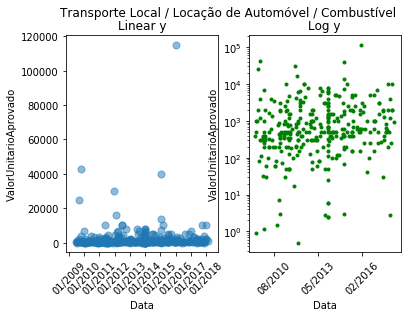

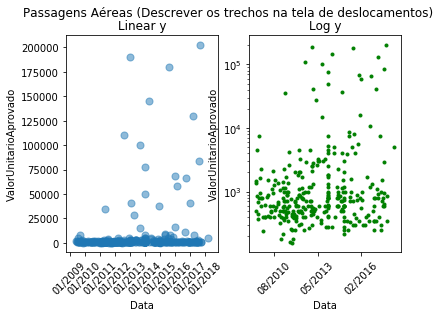

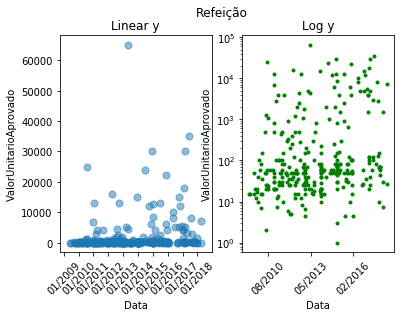

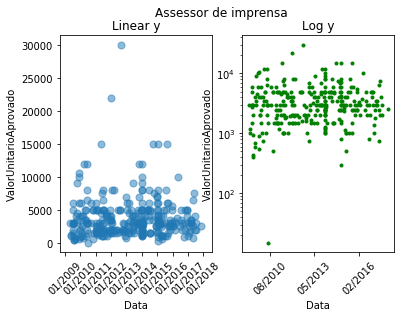

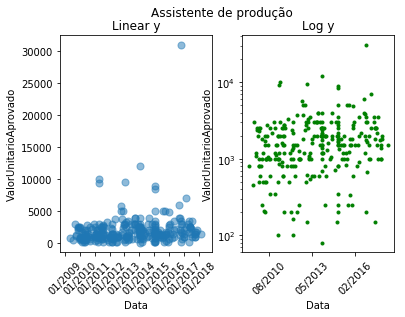

In [8]:
from utils.plotter import Plotter
import matplotlib.pyplot as plt
%matplotlib inline

def plot_item_linear_vs_log(item):
    rows = dt[dt.Item == item]
    x, y = Dates.get_xy_dates(rows, date_column, price_column)
    fig = plt.figure()
    Plotter.plot_scatter_along_time(x, y, figure = fig, subplot = 121, x_label = date_column, y_label = price_column, title = 'Linear y')
    Plotter.plot_log_along_time(x, y, figure = fig, subplot = 122, x_label = date_column, y_label = price_column, title = 'Log y')
    plt.suptitle(item)
    plt.show()

for i in range(5):
    item = top_frequent.index[i]
    plot_item_linear_vs_log(item)